# 📈 Telco Customer Churn Analysis
**Objective:**  
Analyze customer data to identify patterns and factors contributing to churn.  
The goal is to derive business insights using Python (pandas, seaborn, matplotlib) to help the company reduce churn and improve retention.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",0)
df['TotalCharges'] = df['TotalCharges'].astype('float')

#Replacing blanks with 0 as tenure is 0 and no total charges is recorded

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

#Converting 0 and 1 values to No and yes for better representation 

In [64]:
# Churn percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


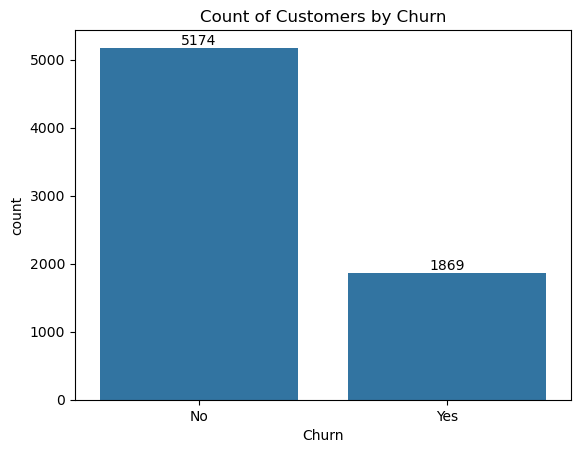

In [16]:
ax= sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0] )
plt.title("Count of Customers by Churn")
plt.show()

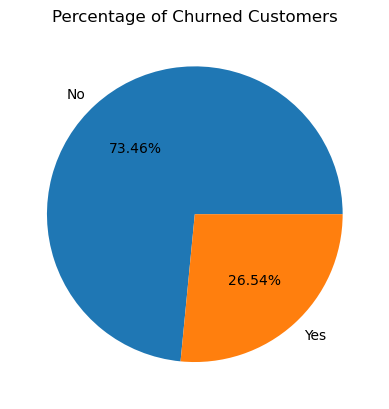

In [62]:
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb["Churn"],labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()


#from the given pie chart we can conclude that 26.54% of customers have churned out.

In [19]:
#Exploring possible reasons for customer to churn out.

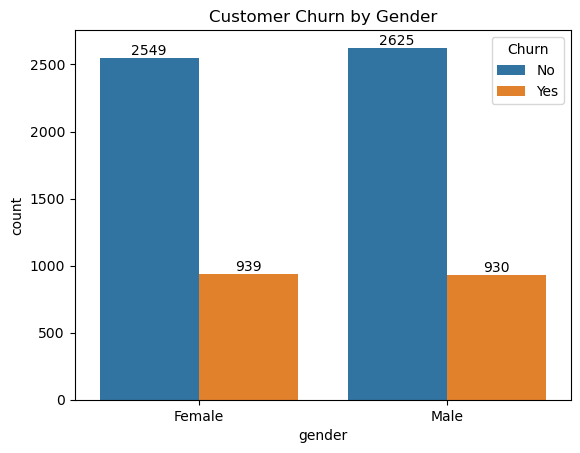

In [60]:
ax = sns.countplot(x = 'gender', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churn by Gender")

plt.savefig('images/Customer Churn by Gender.png', dpi=300, bbox_inches='tight')
plt.show()

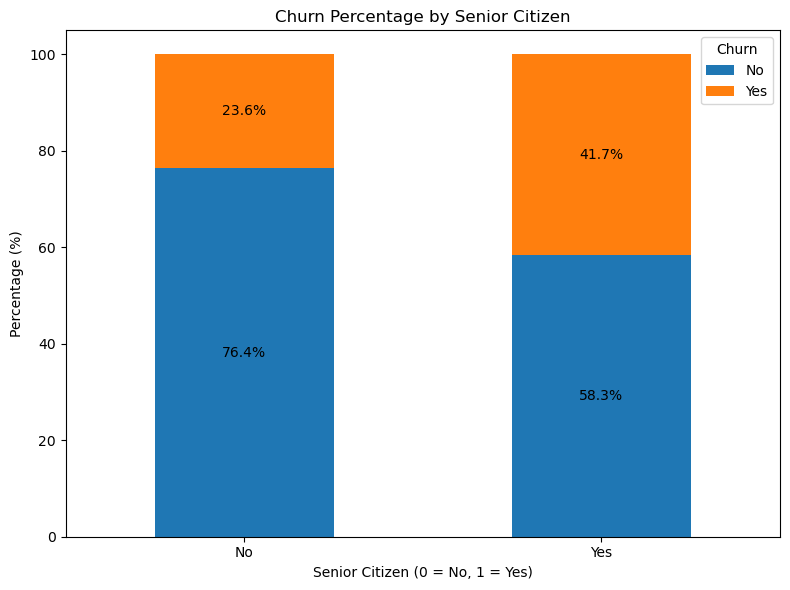

In [56]:
# count of churn vs not churn grouped by SeniorCitizen
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert counts to percentages
percent = grouped.div(grouped.sum(axis=1), axis=0) * 100


# Define categories
categories = ['No', 'Yes'] if 0 in percent.index else percent.index
labels = ['No Churn', 'Churn']

# Plot
ax = percent.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title("Churn Percentage by Senior Citizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title='Churn')

# Add % text labels
for i, (idx, row) in enumerate(percent.iterrows()):
    bottom = 0
    for j, value in enumerate(row):
        plt.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10)
        bottom += value

plt.tight_layout()

plt.savefig('images/Churn Percentage by Senior Citizen.png', dpi=300, bbox_inches='tight')
plt.show()



#comparatively greater percentage of people from Senior citizen hav churned out

<function matplotlib.pyplot.show(close=None, block=None)>

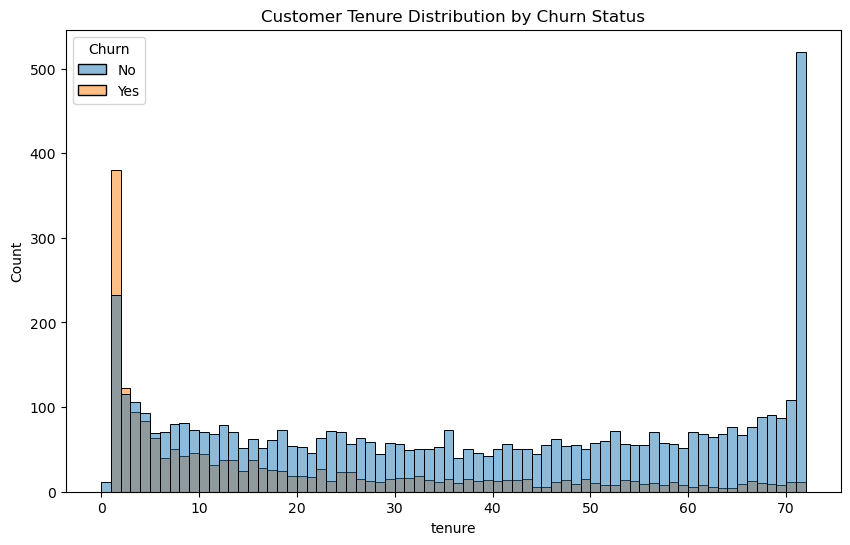

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = "Churn")
plt.title("Customer Tenure Distribution by Churn Status")
plt.show

#most of the people have churned out in initial days

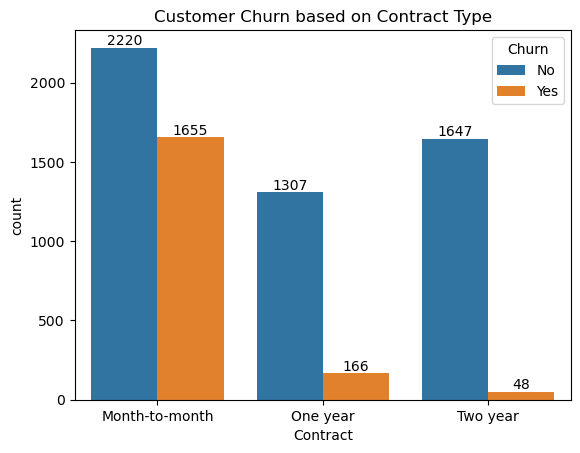

In [58]:
ax = sns.countplot(x ='Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churn based on Contract Type")

plt.savefig('images/Customer Churn based on Contract Type.png', dpi=300, bbox_inches='tight')
plt.show()


#People who have month to month contract are more likely to churn then contract based customers.

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

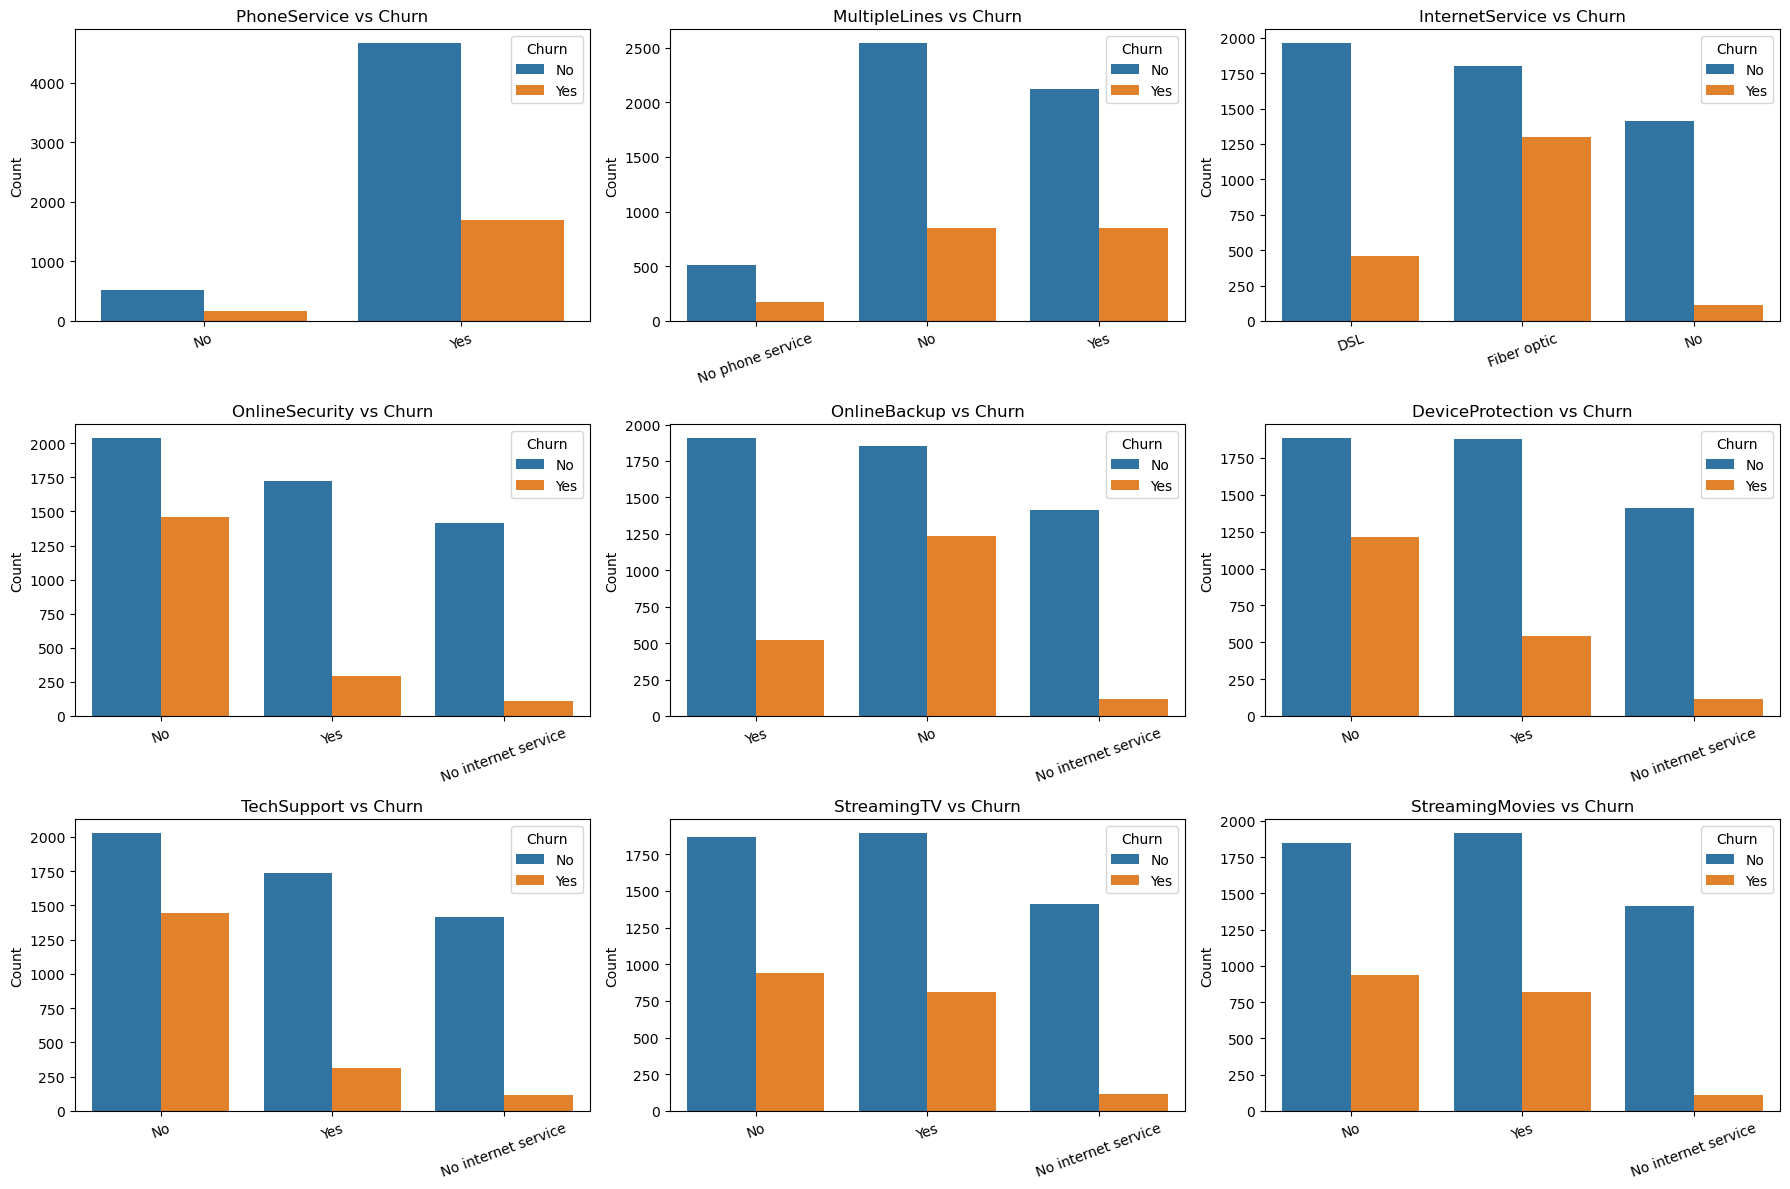

In [28]:
# Number of columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define rows and columns for subplot grid
rows = 3
cols_per_row = 3

plt.figure(figsize=(18, 12))  # Adjust size based on grid

for i, col in enumerate(cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn', fontsize=12)
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()

plt.savefig('images/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



#Fiber Optic users churn the most
#Customers without Online Security & Tech Support churn more

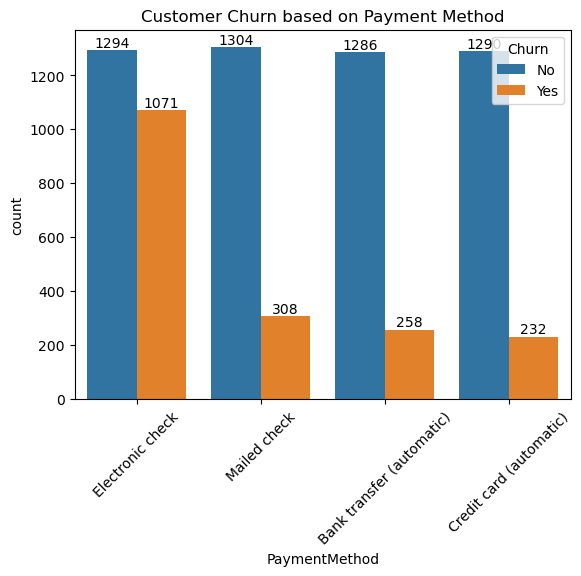

In [30]:
ax = sns.countplot(x ='PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churn based on Payment Method")
plt.xticks(rotation = 45)
plt.show()

#Customer is likely to churn while using Electronic check as a payment method

## ✅ Final Business Insights & Recommendations

- 🔥 **Fiber Optic users churn the most** → Re-evaluate pricing/service for this segment.
- 🔐 Customers without **Online Security & Tech Support** churn more → Upsell or bundle these services.
- 📉 **Month-to-month contracts** have much higher churn → Promote yearly plans with incentives.
- 💡 **Senior citizens** are more likely to churn → Target them with loyalty offers.
